# 0. Import libraries and read in data

In [7]:
import datetime
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

import numpy as np
import matplotlib.pyplot as plt
#import jax.numpy as jnp
#from jax import jit

In [2]:
from os import listdir
from os.path import isfile, join

mypath = "C:\\Users\\vince\\Documents\\GitHub\\automation\\data"

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)

['features.csv', 'shiller.csv', 'sp500.csv', 'sp500.pkl', 'sp500_metadata.pkl', 'stock_scrape.pkl', 'symbols.csv']


In [30]:
SYMBOLS = "AAPL,AMD".split(',')

start, end = '2018-01-01', datetime.date.today()
data = pdr.get_data_yahoo(SYMBOLS, start=start, end=end.strftime('%Y-%m-%d'))

[*********************100%%**********************]  2 of 2 completed


In [31]:
# Clean data
data.columns = data.columns.map('{0[1]} {0[0]}'.format)
df = data

# Normalise data
df = np.log(df)
df

,AAPL Adj Close,AMD Adj Close,AAPL Close,AMD Close,AAPL High,AMD High,AAPL Low,AMD Low,AAPL Open,AMD Open,AAPL Volume,AMD Volume
Date,,,,,,,,,,,,
2018-01-02,3.704159,2.396075,3.762711,2.396075,3.762943,2.399712,3.745142,2.336020,3.750445,2.343727,18.442673,17.603020
2018-01-03,3.703985,2.446685,3.762536,2.446685,3.775917,2.496506,3.760968,2.430098,3.764277,2.451867,18.586802,18.852896
2018-01-04,3.708619,2.494857,3.767171,2.494857,3.769710,2.520113,3.761665,2.482404,3.764335,2.493205,18.312409,18.511463
2018-01-05,3.719941,2.474856,3.778492,2.474856,3.780604,2.503074,3.767286,2.456164,3.769537,2.500616,18.365591,17.971403
2018-01-08,3.716219,2.507972,3.774770,2.507972,3.781971,2.509599,3.772359,2.472328,3.774770,2.485740,18.225532,17.964122
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-20,5.252483,5.113974,5.252483,5.113974,5.257079,5.126876,5.241800,5.102728,5.243492,5.109273,17.607878,17.635813
2024-05-21,5.259317,5.103883,5.259317,5.103883,5.261290,5.110963,5.251854,5.094364,5.252745,5.099866,17.560520,17.216891
2024-05-22,5.251750,5.109092,5.251750,5.109092,5.261757,5.134680,5.248444,5.099012,5.258901,5.120446,17.360765,17.674696


# 1. Generate standard features

<Axes: title={'center': 'Rolling Average Volume 100'}, xlabel='Date'>

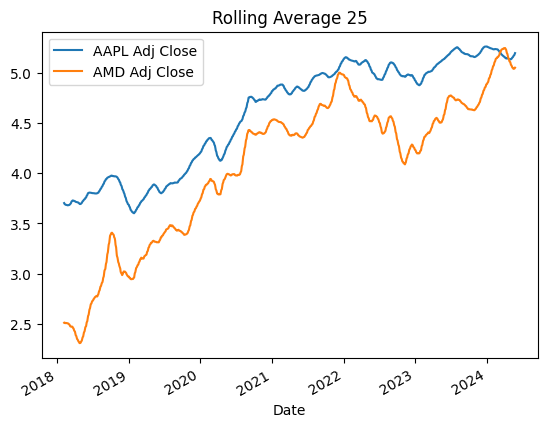

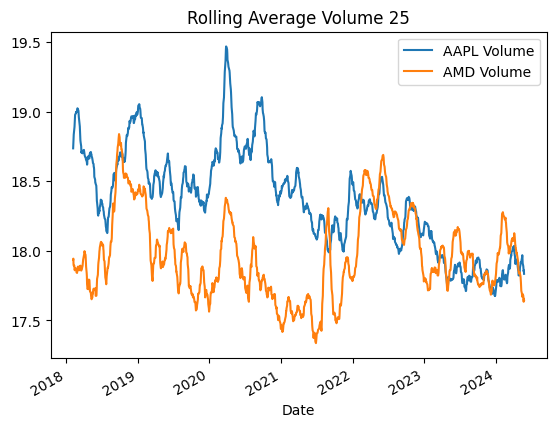

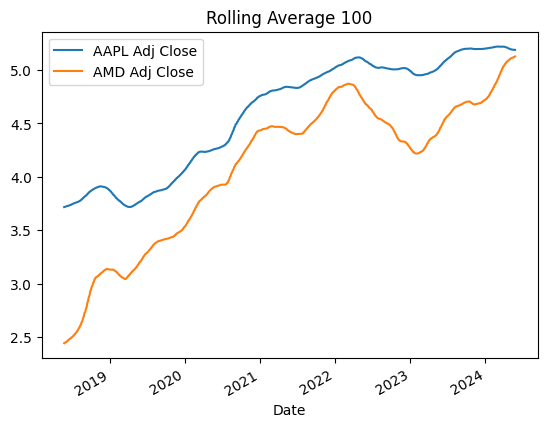

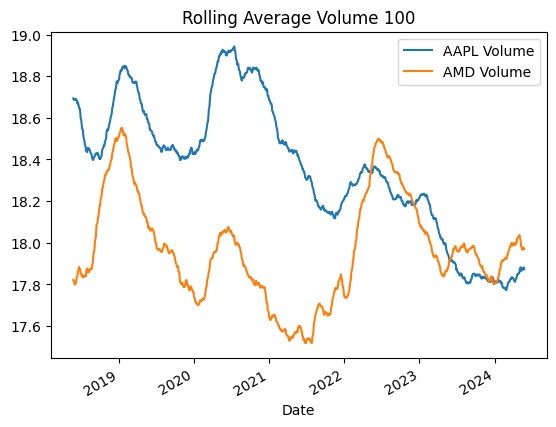

In [32]:
# Generate mean features

window = 25
df_mean_25 = df.rolling(window).mean()[['AAPL Adj Close', 'AMD Adj Close', 'AAPL Volume', 'AMD Volume']]
df_mean_25.tail()

df_mean_25[['AAPL Adj Close', 'AMD Adj Close']].plot(title='Rolling Average 25')
df_mean_25[['AAPL Volume', 'AMD Volume']].plot(title='Rolling Average Volume 25')


# Generate mean features

window = 100
df_mean_100 = df.rolling(window).mean()[['AAPL Adj Close', 'AMD Adj Close', 'AAPL Volume', 'AMD Volume']]
df_mean_100.tail()

df_mean_100[['AAPL Adj Close', 'AMD Adj Close']].plot(title='Rolling Average 100')
df_mean_100[['AAPL Volume', 'AMD Volume']].plot(title='Rolling Average Volume 100')

In [33]:
# Generate spread features

df_spread = pd.DataFrame(index=df.index)
df_spread['Spread'] = df['AAPL High'] - df['AAPL Low']
df_spread.tail()

,Spread
Date,
2024-05-20,0.015279
2024-05-21,0.009436
2024-05-22,0.013313
2024-05-23,0.023145
2024-05-24,0.013417


In [34]:
# Generate derivative features

window = 5
df_derivative_5 = df.rolling(4*window).mean()[['AAPL Adj Close', 'AMD Adj Close', 'AAPL Volume', 'AMD Volume']].diff(periods=window)
df_derivative_5.tail()

,AAPL Adj Close,AMD Adj Close,AAPL Volume,AMD Volume
Date,,,,
2024-05-20,0.031971,0.012281,-0.019535,-0.044666
2024-05-21,0.034004,0.019446,-0.010353,-0.038635
2024-05-22,0.034012,0.021991,-0.043128,-0.006023
2024-05-23,0.032380,0.021740,-0.052852,0.014945
2024-05-24,0.031123,0.018771,-0.038637,0.031494


<Axes: title={'center': 'Derivative'}, xlabel='Date'>

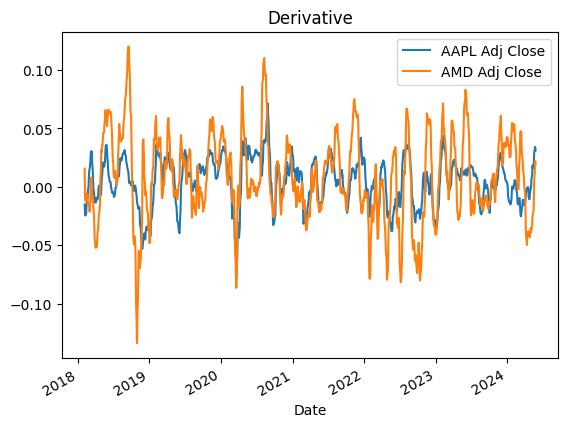

In [35]:
df_derivative_5[['AAPL Adj Close', 'AMD Adj Close']].plot(title='Derivative')

<Axes: title={'center': 'Price Discrepancy 5'}, xlabel='Date'>

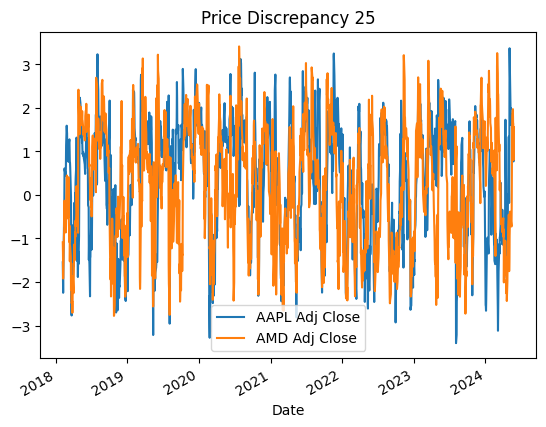

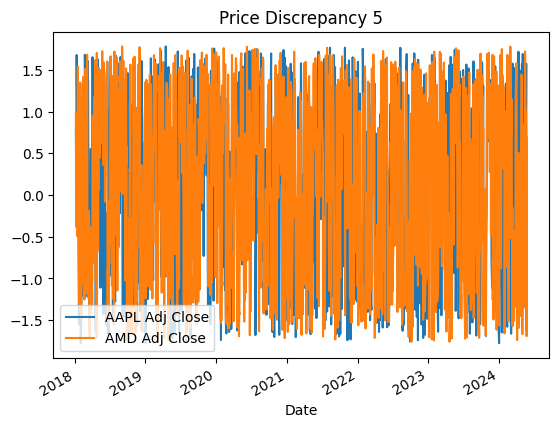

In [36]:
# Generate discrepancy features

window = 25
df_discrepancy_25 = ((df - df.rolling(window).mean())/df.rolling(window).std())[['AAPL Adj Close', 'AMD Adj Close', 'AAPL Volume', 'AMD Volume']]
df_discrepancy_25.tail()

window = 5
df_discrepancy_5 = ((df - df.rolling(window).mean())/df.rolling(window).std())[['AAPL Adj Close', 'AMD Adj Close', 'AAPL Volume', 'AMD Volume']]
df_discrepancy_5.tail()

df_discrepancy_25[['AAPL Adj Close', 'AMD Adj Close']].plot(title='Price Discrepancy 25')
df_discrepancy_5[['AAPL Adj Close', 'AMD Adj Close']].plot(title='Price Discrepancy 5')

<Axes: title={'center': 'max 150'}, xlabel='Date'>

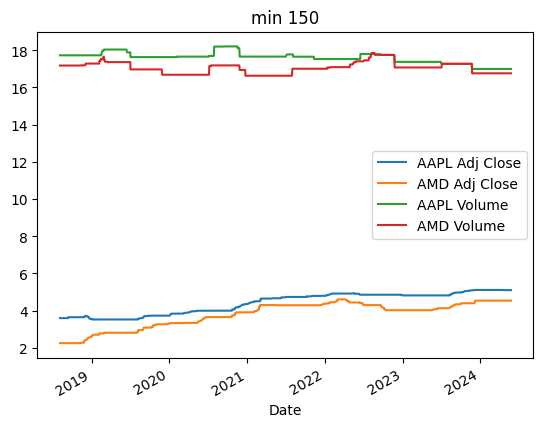

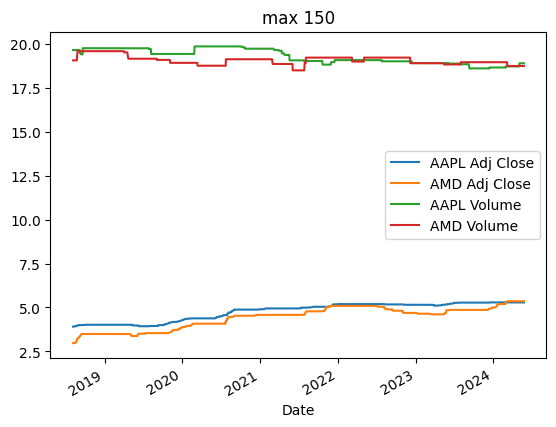

In [37]:
# Generate min and max

window = 150
df_min_150 = (df.rolling(window).min())[['AAPL Adj Close', 'AMD Adj Close', 'AAPL Volume', 'AMD Volume']]
df_max_150 = (df.rolling(window).max())[['AAPL Adj Close', 'AMD Adj Close', 'AAPL Volume', 'AMD Volume']]

df_min_150.plot(title='min 150')
df_max_150.plot(title='max 150')

In [38]:
# Generate lag features

def create_lags(df, lags=[0,1,7,28,364]):
    """
    Create time series features based on time series index.
    """
    df_ = pd.DataFrame(index=df.index)
    df_ = df_.assign(**{
        f'{col} (t-{lag})': df[col].shift(lag)
        for lag in lags
        for col in df
    })

    return df_

df_lags = create_lags(df[['AAPL Adj Close', 'AMD Adj Close', 'AAPL Volume', 'AMD Volume']])

df_lags.tail()

,AAPL Adj Close (t-0),AMD Adj Close (t-0),AAPL Volume (t-0),AMD Volume (t-0),AAPL Adj Close (t-1),AMD Adj Close (t-1),AAPL Volume (t-1),AMD Volume (t-1),AAPL Adj Close (t-7),AMD Adj Close (t-7),AAPL Volume (t-7),AMD Volume (t-7),AAPL Adj Close (t-28),AMD Adj Close (t-28),AAPL Volume (t-28),AMD Volume (t-28),AAPL Adj Close (t-364),AMD Adj Close (t-364),AAPL Volume (t-364),AMD Volume (t-364)
Date,,,,,,,,,,,,,,,,,,,,
2024-05-20,5.252483,5.113974,17.607878,17.635813,5.246340,5.102728,17.535959,18.004323,5.216673,5.026443,17.706984,17.312563,5.121298,5.118832,17.721703,17.903166,4.954010,4.252345,17.985692,17.989362
2024-05-21,5.259317,5.103883,17.560520,17.216891,5.252483,5.113974,17.607878,17.635813,5.209759,5.023354,17.742609,17.443918,5.163659,5.138735,18.327142,17.707219,4.940130,4.250493,18.060014,17.896096
2024-05-22,5.251750,5.109092,17.360765,17.674696,5.259317,5.103883,17.560520,17.216891,5.227251,5.014362,18.092799,17.142674,5.172249,5.095467,18.436488,17.963936,4.952190,4.255187,17.944712,17.853886
2024-05-23,5.230467,5.077858,17.747452,18.336090,5.251750,5.109092,17.360765,17.674696,5.233405,5.031483,17.774295,17.279316,5.150143,5.077172,18.113229,17.933917,4.948749,4.228147,18.147519,17.894036
2024-05-24,5.246919,5.114154,17.407180,17.819117,5.230467,5.077858,17.747452,18.336090,5.245549,5.073109,18.069704,17.581256,5.130789,5.096568,18.115665,17.828321,4.965006,4.258021,18.070594,17.925865


In [21]:
#TVRD Features
import jax.numpy as jnp
from jax import jit

# Defining some methods of differentiating our data
def difference(x):
    x_dim = x.shape[0]
    diagonal = jnp.eye(x_dim-1)
    padding = jnp.zeros((x_dim-1, 1))
    matrix1 = jnp.hstack((diagonal, padding))
    matrix2 = jnp.hstack((padding, diagonal))
    D = matrix2 - matrix1
    dx = jnp.einsum('ij, j -> i', D, x)
    return dx


def difference_quotient(x, y, jitter=0):
    x_dim = x.shape[0]
    diagonal = jnp.eye(x_dim-1)
    padding = jnp.zeros((x_dim-1, 1))
    matrix1 = jnp.hstack((diagonal, padding))
    matrix2 = jnp.hstack((padding, diagonal))
    D = matrix2 - matrix1
    dy = jnp.einsum('ij, j -> i', D, y)
    dx = jnp.einsum('ij, j -> i', D, x)
    if jitter > 0:
        dx = jnp.sqrt(dx**2 + jitter)
    return dy/dx


def grad_regulator(dydx, jitter):
    du = difference(dydx)
    s = du / jnp.sqrt(du**2 + jitter)
    ds = difference(s)
    ds = jnp.insert(ds, 0, s[0])
    ds = jnp.append(ds, -s[-1])
    return ds


def generate_A_matrix(x):
    n = x.shape[0]
    A = np.zeros((n,n-1))
    for i in range(n):
        for j in range(n-1):
            if (x[i] > x[j]) and (x[i] < x[j+1]):
                A[i,j] = x[i] - x[j]
            elif x[j+1] <= x[i]:
                A[i,j] = x[j+1] - x[j]
            else:
                pass

    return jnp.asarray(A)


def grad_loss(dydx, data, info):
    x, y = data
    A, alpha, jitter = info
    residual = jnp.einsum('ij, j -> i', A, dydx) - (y - y[0])
    return jnp.einsum('ji, j -> i', A, residual) - alpha * grad_regulator(dydx, jitter)


grad_loss_jit = jit(grad_loss)



def tvrd(x, y, params=None, iters=10000, lr=1e-2):
    if params == None:
        alpha, jitter = 0.2, 0.001
    else:
        alpha, jitter = params

    n = x.shape[0]

    A = generate_A_matrix(x)
    dydx = difference_quotient(x, y)
    data = x, y

    info = A, alpha, jitter
    u = dydx
    #u = jnp.zeros(x.shape[0] - 1) uncomment for initialisation at zero derivative
    for idx in range(iters):
        u -= lr * jnp.exp(-2 * idx / iters) * grad_loss_jit(u, data, info) / n

    Au = jnp.einsum('ij, j -> i', A, u) + y[0]

    return x, y, u, Au


def tvrd_wrapped(ydata):
    N = len(ydata)
    alpha, jitter = 0.5, 1e-5
    lr = 3e-2
    iters = 5000
    xdata = np.arange(0, N)
    _, _, u, Au = tvrd(xdata, ydata, (alpha, jitter), lr=lr, iters=iters)
    return Au[-1]


def tvrd_derivative_wrapped(ydata):
    N = len(ydata)
    alpha, jitter = 0.5, 1e-5
    lr = 3e-2
    iters = 5000
    xdata = np.arange(0, N)
    _, _, u, Au = tvrd(xdata, ydata, (alpha, jitter), lr=lr, iters=iters)
    return u[-1]



In [18]:
window = 100
df_tvrd = df['AAPL Adj Close'].rolling(window).apply(tvrd_wrapped, raw=True)

In [22]:
window = 100
df_tvrd_derivative = df['AAPL Adj Close'].rolling(window).apply(tvrd_derivative_wrapped, raw=True)

In [27]:
df_TVRD = pd.DataFrame(index=df.index)
df_TVRD['Au'] = df_tvrd
df_TVRD['u'] = df_tvrd_derivative
df_TVRD['sign(u)'] = np.sign(df_TVRD['u'])
df_TVRD

,Au,u,sign(u)
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN
...,...,...,...
2024-05-20,5.258807,0.006575,1.0
2024-05-21,5.263378,0.006179,1.0
2024-05-22,5.263670,0.005015,1.0


# 2. Combine features

In [87]:
df_list = [df['AAPL Adj Close'],
           df_mean_25.add_suffix('_mean_25'),
           df_mean_100.add_suffix('_mean_100'),
           df_spread.add_suffix('_spread'),
           #np.sign(df_derivative_5.add_suffix('_derivative_5')),
           df_discrepancy_5.add_suffix('_discrepancy_25'),
           #np.sign(df_discrepancy_25.add_suffix('_discrepancy_25')),
           #df_min_150.add_suffix('_min_150'),
           #df_max_150.add_suffix('_max_150'),
           #df_lags,
           df_TVRD.add_suffix('_TVRD')
           ]

from functools import reduce

DF_FEATURES = reduce(lambda x, y: pd.merge(x, y, on = 'Date'), df_list)
DF_FEATURES

,AAPL Adj Close,AAPL Adj Close_mean_25,AMD Adj Close_mean_25,AAPL Volume_mean_25,AMD Volume_mean_25,AAPL Adj Close_mean_100,AMD Adj Close_mean_100,AAPL Volume_mean_100,AMD Volume_mean_100,Spread_spread,AAPL Adj Close_discrepancy_25,AMD Adj Close_discrepancy_25,AAPL Volume_discrepancy_25,AMD Volume_discrepancy_25,Au_TVRD,u_TVRD,sign(u)_TVRD
Date,,,,,,,,,,,,,,,,,
2018-01-02,3.704159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,3.703985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,3.708619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,3.719941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013317,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,3.716219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009613,0.781386,0.986374,-1.175397,-0.436051,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-20,5.252483,5.174698,5.040843,17.890269,17.677121,5.188883,5.122024,17.879749,17.976316,0.015279,1.105219,0.973466,-0.709888,-0.272628,5.258807,0.006575,1.0
2024-05-21,5.259317,5.179839,5.041136,17.868063,17.652664,5.188868,5.123221,17.878469,17.971404,0.009436,1.574995,0.440516,-0.678526,-1.353355,5.263378,0.006179,1.0
2024-05-22,5.251750,5.185004,5.044016,17.852678,17.633850,5.188755,5.124289,17.878643,17.968439,0.013313,0.099193,0.577206,-1.378675,-0.172291,5.263670,0.005015,1.0


In [103]:
DF_TARGET = 0.5*(np.sign(pd.DataFrame(df['AAPL Adj Close'].shift(-1)).diff(1).dropna()) + 1)
DF_TARGET = pd.DataFrame(df['AAPL Adj Close'].shift(-1)).diff(1).dropna()
#DF_TARGET = #pd.DataFrame(df['AAPL Adj Close'].shift(-5)).dropna()
DF_TARGET

,AAPL Adj Close
Date,
2018-01-03,0.004634
2018-01-04,0.011321
2018-01-05,-0.003721
2018-01-08,-0.000115
2018-01-09,-0.000229
...,...
2024-05-17,0.006143
2024-05-20,0.006834
2024-05-21,-0.007567


# 3. Run XGBoost

In [104]:
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from xgboost.callback import EarlyStopping

Starting optimization using XGBoost


‣ Training: 2018-01-02 to 2023-03-13
‣ Testing: 2023-03-15 to 2023-04-26
[0]	validation_0-mae:0.24961	validation_1-mae:0.24778


[19]	validation_0-mae:0.01041	validation_1-mae:0.01109


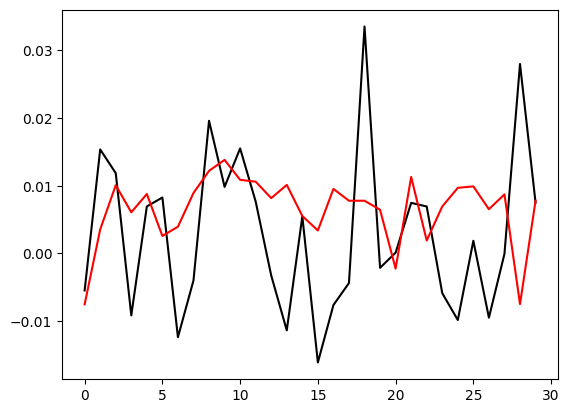



‣ Training: 2018-01-02 to 2023-04-25
‣ Testing: 2023-04-27 to 2023-06-08
[0]	validation_0-mae:0.24956	validation_1-mae:0.24791
[19]	validation_0-mae:0.01049	validation_1-mae:0.01050


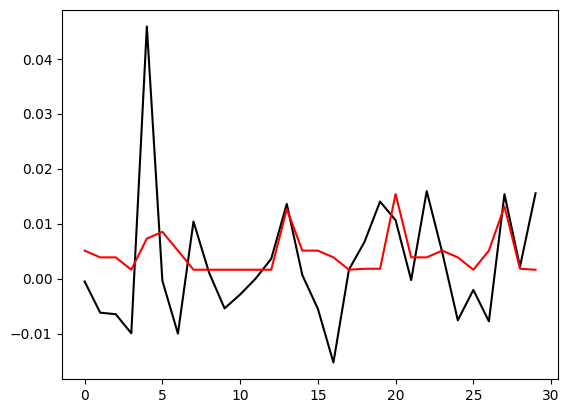



‣ Training: 2018-01-02 to 2023-06-07
‣ Testing: 2023-06-09 to 2023-07-24
[0]	validation_0-mae:0.24950	validation_1-mae:0.24870
[19]	validation_0-mae:0.01002	validation_1-mae:0.01039


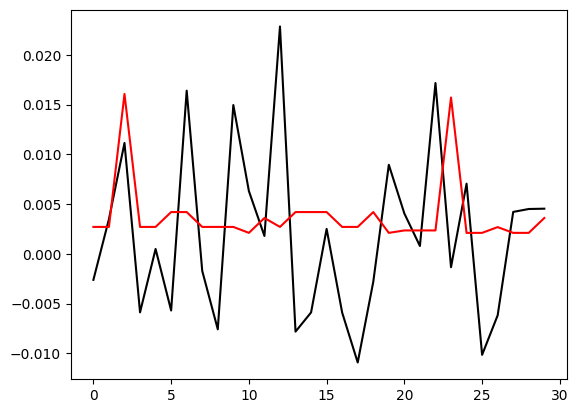



‣ Training: 2018-01-02 to 2023-07-21
‣ Testing: 2023-07-25 to 2023-09-05
[0]	validation_0-mae:0.24947	validation_1-mae:0.25358
[19]	validation_0-mae:0.01040	validation_1-mae:0.01656


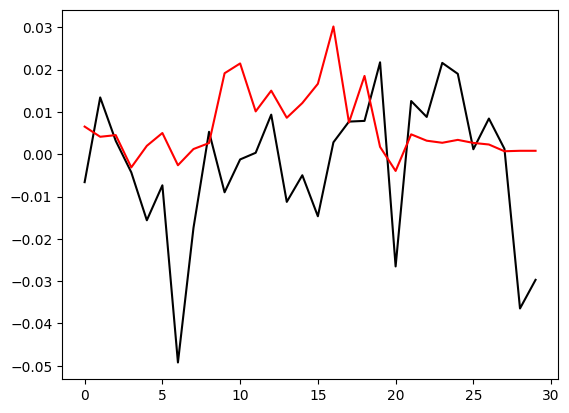



‣ Training: 2018-01-02 to 2023-09-01
‣ Testing: 2023-09-06 to 2023-10-17
[0]	validation_0-mae:0.24954	validation_1-mae:0.25098
[19]	validation_0-mae:0.01003	validation_1-mae:0.00967


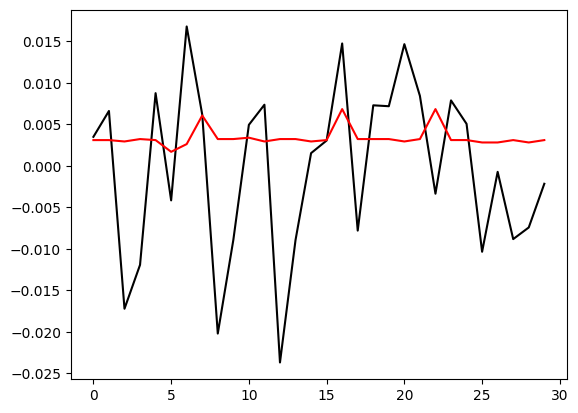



‣ Training: 2018-01-02 to 2023-10-16
‣ Testing: 2023-10-18 to 2023-11-29
[0]	validation_0-mae:0.24958	validation_1-mae:0.24767
[19]	validation_0-mae:0.01041	validation_1-mae:0.00911


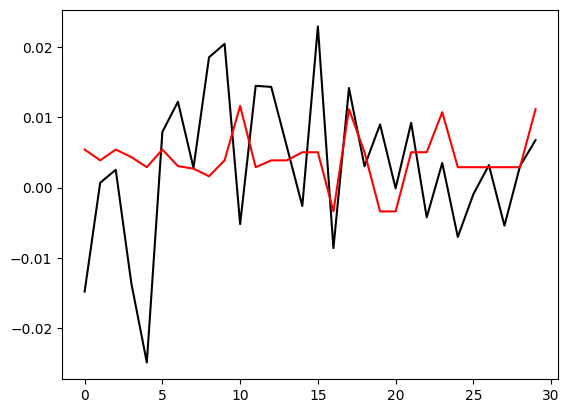



‣ Training: 2018-01-02 to 2023-11-28
‣ Testing: 2023-11-30 to 2024-01-12
[0]	validation_0-mae:0.24959	validation_1-mae:0.25215
[19]	validation_0-mae:0.01023	validation_1-mae:0.00928


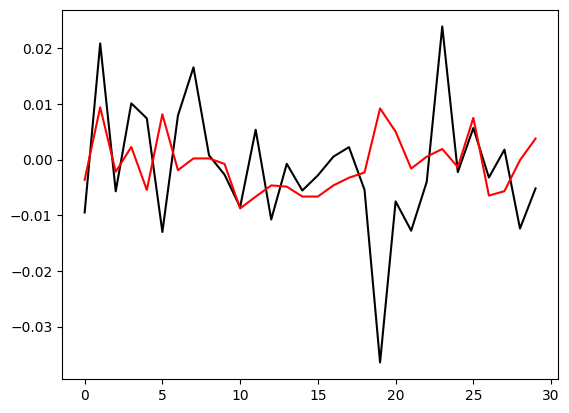



‣ Training: 2018-01-02 to 2024-01-11
‣ Testing: 2024-01-16 to 2024-02-27
[0]	validation_0-mae:0.24959	validation_1-mae:0.25090
[19]	validation_0-mae:0.00993	validation_1-mae:0.01035


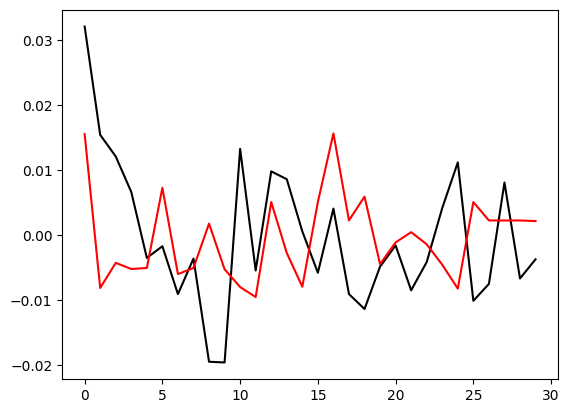



‣ Training: 2018-01-02 to 2024-02-26
‣ Testing: 2024-02-28 to 2024-04-10
[0]	validation_0-mae:0.24958	validation_1-mae:0.25133
[19]	validation_0-mae:0.01021	validation_1-mae:0.01627


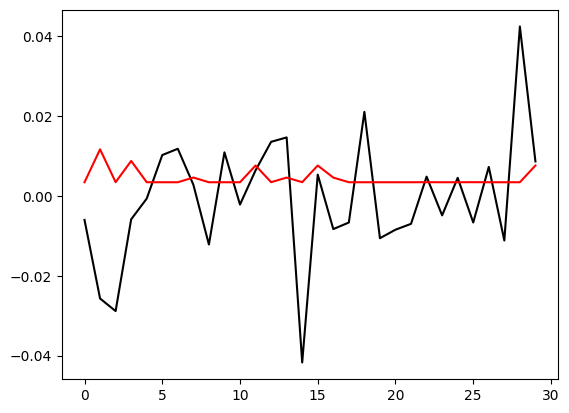



‣ Training: 2018-01-02 to 2024-04-09
‣ Testing: 2024-04-11 to 2024-05-22
[0]	validation_0-mae:0.24957	validation_1-mae:0.24800
[19]	validation_0-mae:0.01036	validation_1-mae:0.01473


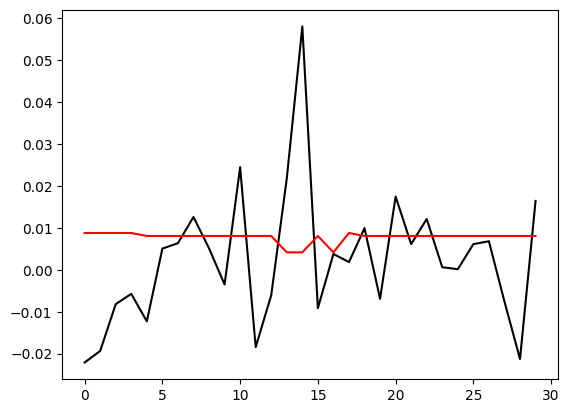

In [106]:
tss = TimeSeriesSplit(n_splits=10, test_size=30, gap=1)

fold = 0
preds = []
scores = []

print('Starting optimization using', 'XGBoost')

for train_idx, val_idx in tss.split(DF_TARGET.dropna()):

    # Load data
    train = DF_FEATURES.iloc[train_idx]
    test = DF_FEATURES.iloc[val_idx]

    print('\n',
          f'‣ Training: {train.index.min():%Y-%m-%d} to {train.index.max():%Y-%m-%d}',
          f'‣ Testing: {test.index.min():%Y-%m-%d} to {test.index.max():%Y-%m-%d}', sep='\n')

    # Labels
    X_train = train
    y_train = DF_TARGET.iloc[train_idx]
    X_test = test
    y_test = DF_TARGET.iloc[val_idx]

    reg = xgb.XGBRegressor(
        base_score=0.5, booster='gbtree',
        n_estimators=20,
        early_stopping_rounds=2000,
        objective='reg:absoluteerror',
        max_depth=5,
        learning_rate=0.5
    )

    reg.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100
    )

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.linalg.norm(y_test.to_numpy() - y_pred)
    scores.append(score)

    plt.plot(y_test.to_numpy(), color='k')
    plt.plot(y_pred, color='r')
    plt.show()

In [107]:
print(f'Score across folds: {np.mean(scores):0.4}')
print(f'Fold scores: {scores}')

Score across folds: 0.4078
Fold scores: [0.3982618175568644, 0.3667705253513029, 0.2773891661555074, 0.6209964507892768, 0.32843101830806926, 0.33947666026446727, 0.36987793222661813, 0.37662881764904244, 0.49419418607615867, 0.5056953986006041]


In [100]:
reg

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=2000,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, objective='reg:absoluteerror', ...)

[0.03070269 0.05413596 0.05343035 0.05322852 0.06385942 0.06310065
 0.06529575 0.06197204 0.05422848 0.07490793 0.06163992 0.06549289
 0.07671137 0.06517881 0.09115518 0.06496009 0.        ]


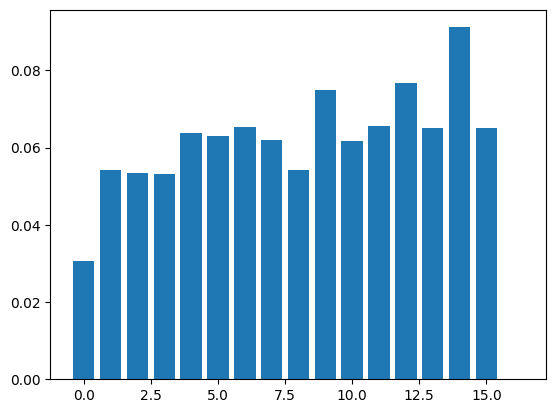

In [108]:
print(reg.feature_importances_)
# plot
plt.bar(range(len(reg.feature_importances_)), reg.feature_importances_)
plt.show()

<Axes: >

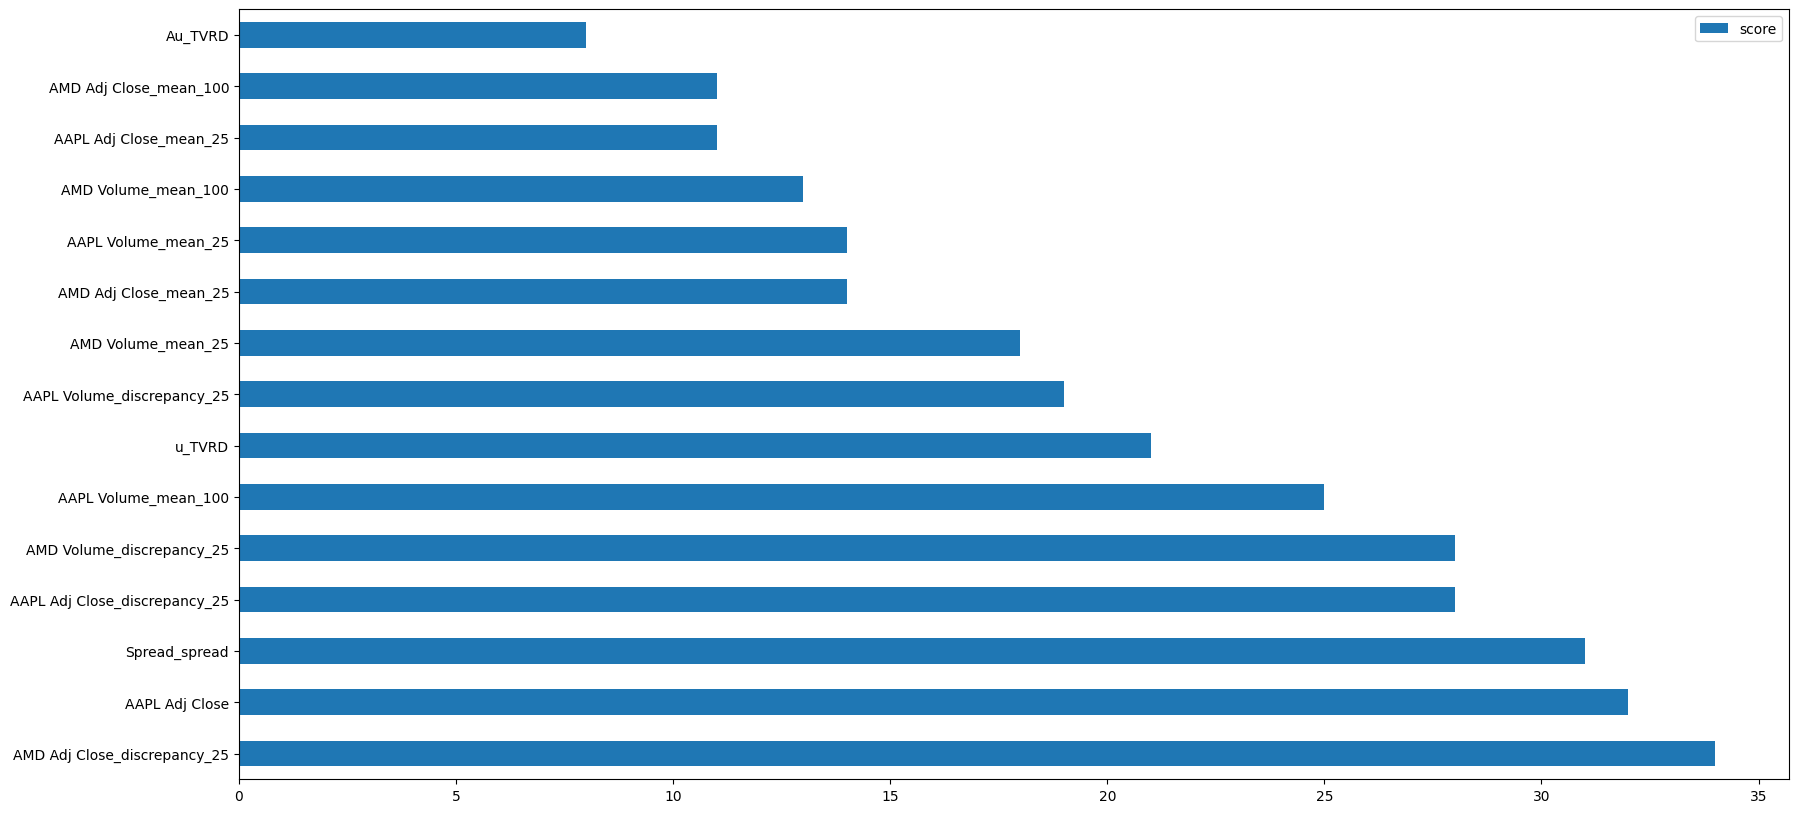

In [109]:
feature_important = reg.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())   
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(15, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

# 4. Backtest

In [127]:
y_pred = reg.predict(X_test)